# Mount data from drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd '/content/drive/My Drive/CV Project/source_code'

/content/drive/My Drive/CV Project/SSD


In [14]:
!ls

 config				      __pycache__
 data				      SSD
 dataset			     'SSD detect.ipynb'
 demo_images			      svm
'detect Faster RCNN notebook.ipynb'  'Train Faster RCNN notebook.ipynb'
 Evaluation.ipynb		     'Train SSD.ipynb'
 faster_rcnn			      utils.py
 loss.txt			     'Visualize results.ipynb'
 model				      widerface_evaluate


In [15]:
! mkdir '/content/data'

mkdir: cannot create directory ‘/content/data’: File exists


In [16]:
! unrar x '/content/drive/My Drive/CV Project/source_code/dataset/wider_face.rar'  '/content/data/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/CV Project/SSD/dataset/wider_face.rar


Would you like to replace the existing file /content/data/wider_face/gt.txt
17147541 bytes, modified on 2019-05-03 04:39
with a new one
17147541 bytes, modified on 2019-05-03 04:39

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit q

Program aborted


# Import svm detection function 

In [17]:
from svm.svm_detect import detect_multiscale
from tqdm.notebook import tqdm
import joblib
import os
import cv2

svm_model = joblib.load("./model/svm/svm_hard_negative.pkl")

# Perform detection on a test image

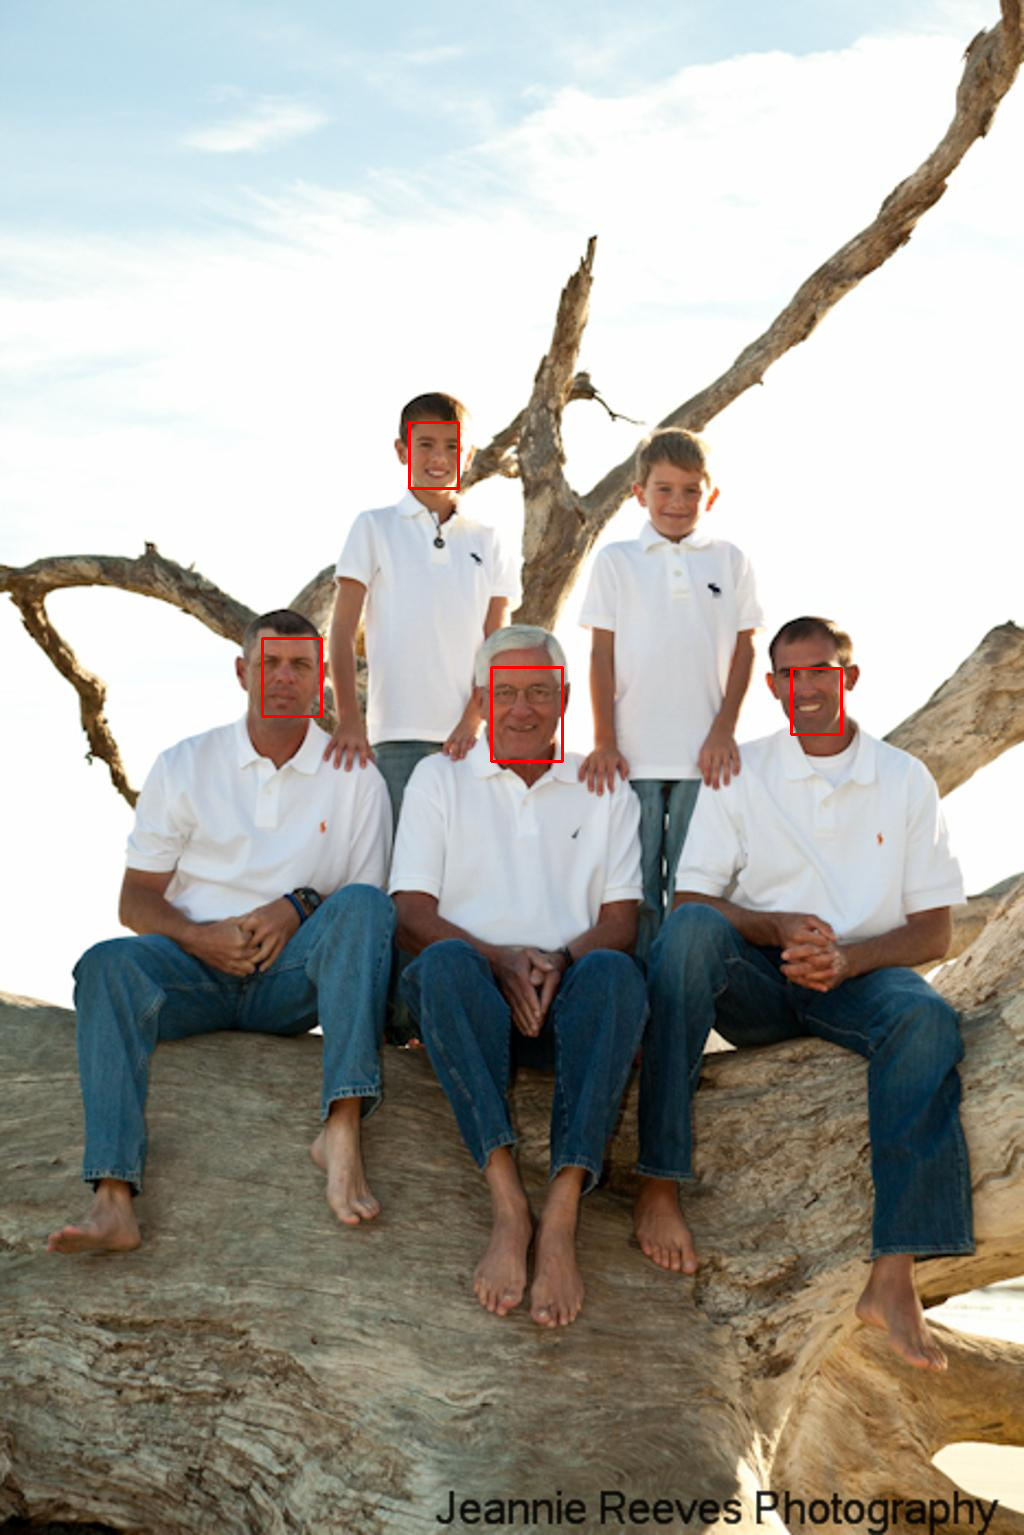

In [18]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/data/wider_face/train/images/6--Funeral/6_Funeral_Funeral_6_383.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_6.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_573.jpg'
img_path = '/content/data/wider_face/train/images/52--Photographers/52_Photographers_photographertakingphoto_52_339.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_770.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_644.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Group_12_Group_Group_12_51.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_731.jpg'
# img_path = '/content/data/wider_face/val/images/13--Interview/13_Interview_Interview_Sequences_13_33.jpg'

image = cv2.imread(img_path)
im = detect_multiscale(svm_model, image, confidence_threshold = 0.8, visualize = True)
cv2_imshow(im)


# Load the svm model retrained with hard negative mining

In [21]:
svm_model = joblib.load("./model/svm/svm_hard_negative.pkl")

In [19]:
with open('/content/data/wider_face/val/wider_val.txt', 'r') as f:
  val_images = f.read().splitlines()

print(val_images[0:5])

['/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_329.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_10.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_1037.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_115.jpg', '/24--Soldier_Firing/24_Soldier_Firing_Soldier_Firing_24_129.jpg']


Inference and save result on the test set

In [22]:
pred_dir = './widerface_evaluate/predictions/hog_svm'

for img_name in tqdm(val_images):
  img_path = '/content/data/wider_face/val/images' + img_name
  image = cv2.imread(img_path)
  # print(img_path)
  detections, probabilities = detect_multiscale(svm_model, image, confidence_threshold = 0.02)
  num_faces = len(detections)

  pred_file = pred_dir + img_name[:-4] + ".txt"
  class_dir = "/".join(pred_file.split("/")[:-1] )

  if not os.path.isdir(class_dir):
    os.mkdir(class_dir)
  # print(pred_file[:-4])
  with open(pred_file, 'w') as f:
    file_name = pred_file.replace("/widerface_evaluate", "")[:-4]
    f.write( file_name+ '\n')
    f.write(str(num_faces) + '\n')

    for i  in range(num_faces):
      box = detections[i]
      confidence = probabilities[i]
      x_min, y_min = int(box[0]), int(box[1])
      w = int(box[2]) - int(box[0])
      h = int(box[3]) - int(box[1])
      line = str(x_min) + " " + str(y_min) + " " + str(w) + " " + str(h) + " " + str(confidence) + " \n"
      f.write(line)
      # print(line + \n)

      


  0%|          | 0/3226 [00:00<?, ?it/s]

# Load the baseline svm model

In [ ]:
svm_model = joblib.load("./model/svm/svm_baseline.pkl")

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/data/wider_face/train/images/6--Funeral/6_Funeral_Funeral_6_383.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_6.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_573.jpg'
img_path = '/content/data/wider_face/train/images/52--Photographers/52_Photographers_photographertakingphoto_52_339.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_770.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_644.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Group_12_Group_Group_12_51.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_731.jpg'
# img_path = '/content/data/wider_face/val/images/13--Interview/13_Interview_Interview_Sequences_13_33.jpg'

image = cv2.imread(img_path)
im = detect_multiscale(svm_model, image, confidence_threshold = 0.8, visualize = True)
cv2_imshow(im)


Inference and save result on the test set

In [23]:
pred_dir = './widerface_evaluate/predictions/hog_svm_baseline'

for img_name in tqdm(val_images):
  img_path = '/content/data/wider_face/val/images' + img_name
  image = cv2.imread(img_path)
  # print(img_path)
  detections, probabilities = detect_multiscale(svm_model, image, confidence_threshold = 0.9)
  num_faces = len(detections)

  pred_file = pred_dir + img_name[:-4] + ".txt"
  class_dir = "/".join(pred_file.split("/")[:-1] )

  if not os.path.isdir(class_dir):
    os.mkdir(class_dir)
  # print(pred_file[:-4])
  with open(pred_file, 'w') as f:
    file_name = pred_file.replace("/widerface_evaluate", "")[:-4]
    f.write( file_name+ '\n')
    f.write(str(num_faces) + '\n')

    for i  in range(num_faces):
      box = detections[i]
      confidence = probabilities[i]
      x_min, y_min = int(box[0]), int(box[1])
      w = int(box[2]) - int(box[0])
      h = int(box[3]) - int(box[1])
      line = str(x_min) + " " + str(y_min) + " " + str(w) + " " + str(h) + " " + str(confidence) + " \n"
      f.write(line)
      # print(line + \n)

      

      


  0%|          | 0/3226 [00:00<?, ?it/s]